In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
#Importacion
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')


#Se arregla el caso de los Emiratos Arabes Unidos
df_2018.at[19, 'GDP per capita'] = 1.467
df_2018.at[19, 'Social support'] = 1.296
df_2018.at[19, 'Healthy life expectancy'] = 0.776
df_2018.at[19, 'Freedom to make life choices'] = 0.670
df_2018.at[19, 'Generosity'] = 0.284
df_2018.at[19, 'Perceptions of corruption'] = 0.186

df_2018.loc[19]


Overall rank                                      20
Country or region               United Arab Emirates
Score                                          6.774
GDP per capita                                 1.467
Social support                                 1.296
Healthy life expectancy                        0.776
Freedom to make life choices                    0.67
Generosity                                     0.284
Perceptions of corruption                      0.186
Name: 19, dtype: object

In [4]:
#Se hacen copias del df
df_2015C = pd.read_csv('2015.csv')
df_2016C = pd.read_csv('2016.csv')
df_2017C = pd.read_csv('2017.csv')
df_2018C = pd.read_csv('2018.csv')
df_2019C = pd.read_csv('2019.csv')


#Se hace un solo df con todas las columnas en común y una columna extra del año
dataframe_2015 = df_2015C[['Country', 'Happiness Rank', 'Happiness Score', 
                                 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 
                                 'Freedom', 'Trust (Government Corruption)', 'Generosity']].copy()
dataframe_2015.rename(columns={
    'Economy (GDP per Capita)': 'GDP',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Corruption'
}, inplace=True)
dataframe_2015['Year'] = 2015

# DataFrame 2016
dataframe_2016 = df_2016C[['Country', 'Happiness Rank', 'Happiness Score', 
                                 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 
                                 'Freedom', 'Trust (Government Corruption)', 'Generosity']].copy()
dataframe_2016.rename(columns={
    'Economy (GDP per Capita)': 'GDP',
    'Health (Life Expectancy)': 'Health',
    'Trust (Government Corruption)': 'Corruption'
}, inplace=True)
dataframe_2016['Year'] = 2016

# DataFrame 2017
dataframe_2017 = df_2017C[['Country', 'Happiness.Rank', 'Happiness.Score', 
                                 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 
                                 'Freedom', 'Trust..Government.Corruption.', 'Generosity']].copy()
dataframe_2017.rename(columns={
    'Happiness.Rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Economy..GDP.per.Capita.': 'GDP',
    'Health..Life.Expectancy.': 'Health',
    'Trust..Government.Corruption.': 'Corruption'
}, inplace=True)
dataframe_2017['Year'] = 2017

# DataFrame 2018
dataframe_2018 = df_2018C[['Country or region', 'Overall rank', 'Score', 
                                 'GDP per capita', 'Healthy life expectancy', 
                                 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].copy()
dataframe_2018.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP',
    'Healthy life expectancy': 'Health',
    'Perceptions of corruption': 'Corruption',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)
dataframe_2018['Year'] = 2018

# DataFrame 2019
dataframe_2019 = df_2019C[['Country or region', 'Overall rank', 'Score', 
                                 'GDP per capita', 'Healthy life expectancy', 
                                 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']].copy()
dataframe_2019.rename(columns={
    'Country or region': 'Country',
    'Overall rank': 'Happiness Rank',
    'Score': 'Happiness Score',
    'GDP per capita': 'GDP',
    'Healthy life expectancy': 'Health',
    'Perceptions of corruption': 'Corruption',
    'Freedom to make life choices': 'Freedom'
}, inplace=True)
dataframe_2019['Year'] = 2019

In [5]:
# Concatenar todos los DataFrames en uno solo
df_concatenated = pd.concat([dataframe_2015, dataframe_2016, dataframe_2017, dataframe_2018, dataframe_2019], ignore_index=True)

# Verificar el resultado
df_concatenated.head()

df_concatenated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Happiness Rank   782 non-null    int64  
 2   Happiness Score  782 non-null    float64
 3   GDP              782 non-null    float64
 4   Health           782 non-null    float64
 5   Freedom          782 non-null    float64
 6   Corruption       781 non-null    float64
 7   Generosity       782 non-null    float64
 8   Year             782 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 55.1+ KB


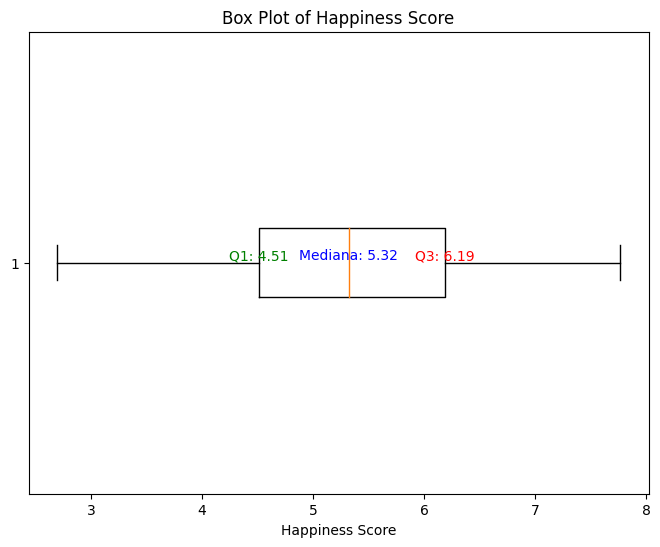

In [6]:
# Cálculos de estadísticos para el box plot
q1 = df_concatenated['Happiness Score'].quantile(0.25)
median = df_concatenated['Happiness Score'].median()
q3 = df_concatenated['Happiness Score'].quantile(0.75)

# Crear el gráfico de box plot con etiquetas
plt.figure(figsize=(8, 6))
plt.boxplot(df_concatenated['Happiness Score'].dropna(), vert=False)
plt.title('Box Plot of Happiness Score')
plt.xlabel('Happiness Score')

# Agregar etiquetas para mediana, Q1, y Q3
plt.text(median, 1, f'Mediana: {median:.2f}', ha='center', va='bottom', color='blue')
plt.text(q1, 1, f'Q1: {q1:.2f}', ha='center', va='bottom', color='green')
plt.text(q3, 1, f'Q3: {q3:.2f}', ha='center', va='bottom', color='red')

plt.show()

Como podemos ver el happiness score varía entre 2 y casi 8. Por ende la medida para cortar a los paises entre felices e infelices será la mediana de 5.32.

In [7]:
#Hacer la nueva columna :
# Calcular la mediana del "Happiness Score"
median_happiness = df_concatenated['Happiness Score'].median()

df_concatenated['Felicidad']=df_concatenated['Happiness Score']>median_happiness

df_concatenated

,Country,Happiness Rank,Happiness Score,GDP,Health,Freedom,Corruption,Generosity,Year,Felicidad
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015,True
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015,True
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015,True
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015,True
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015,True
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,2019,False
778,Tanzania,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,2019,False
779,Afghanistan,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,2019,False
780,Central African Republic,155,3.083,0.02600,0.10500,0.22500,0.03500,0.23500,2019,False


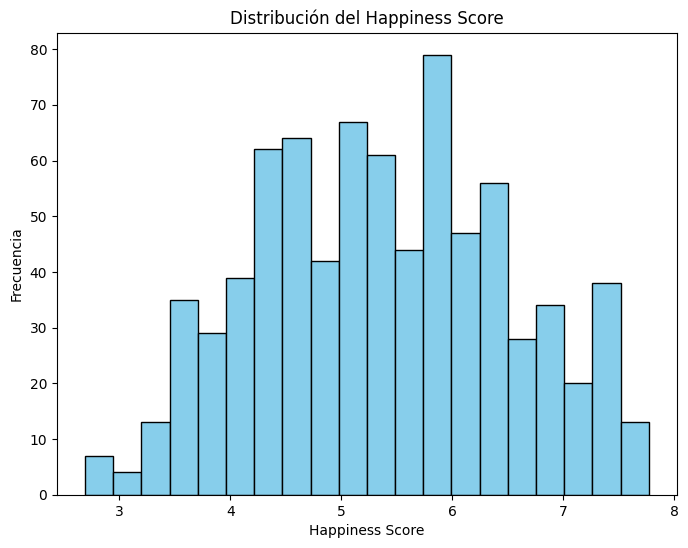

In [8]:
# Crear un histograma para la variable "Happiness Score"
plt.figure(figsize=(8, 6))
plt.hist(df_concatenated['Happiness Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frecuencia')
plt.show()


La mediana parace ser un buen punto para partir los datos.

Ahora se examinará que variable pueden estar relacionadas y cuales no

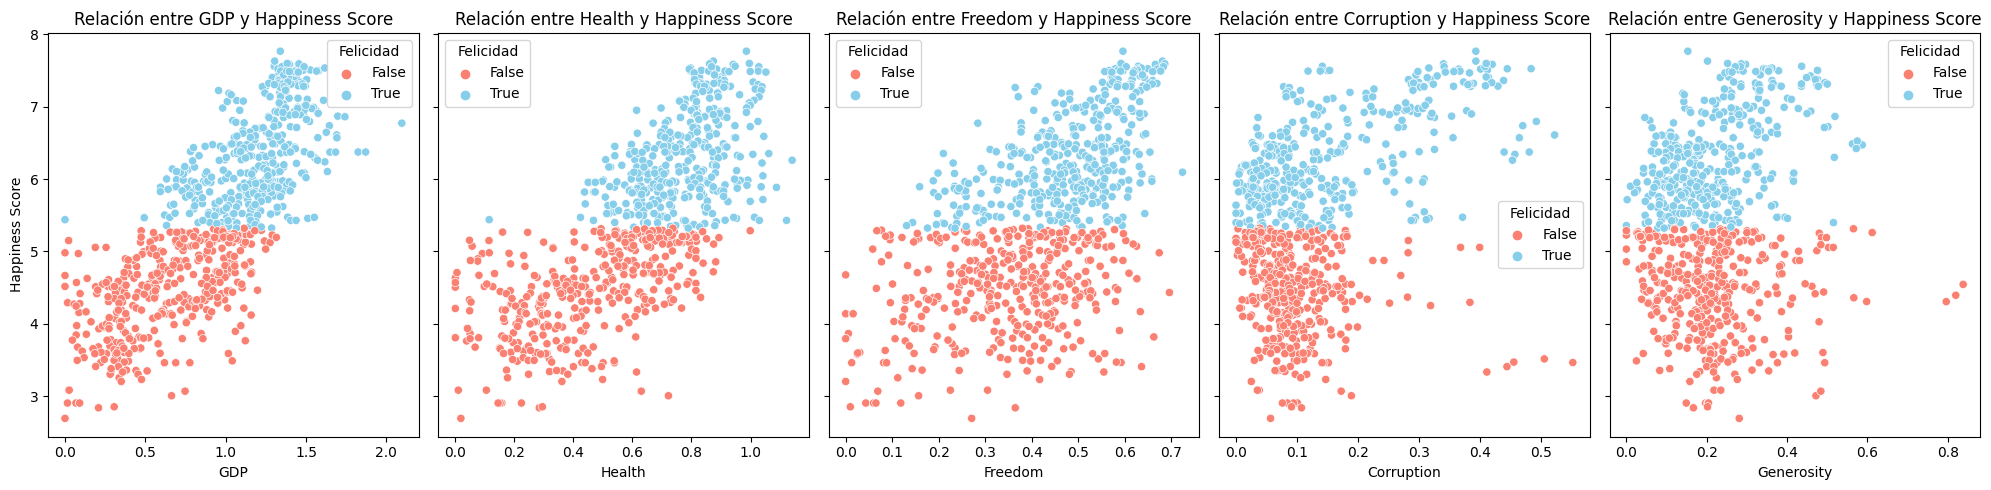

In [10]:
# Crear gráficos de dispersión para la relación entre Happiness Score y cada variable seleccionada
variables = ['GDP', 'Health', 'Freedom', 'Corruption', 'Generosity']
fig, axes = plt.subplots(1, len(variables), figsize=(20, 5), sharey=True)

# Generar un scatter plot para cada variable con Happiness Score
for i, var in enumerate(variables):
    sns.scatterplot(data=df_concatenated, x=var, y='Happiness Score', hue='Felicidad', palette=['salmon', 'skyblue'], ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y Happiness Score')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Happiness Score' if i == 0 else '')

# Mostrar la visualización con los gráficos separados
plt.tight_layout()
plt.show()

Como se puede ver parce ser que las unicas variables que no parecen tener mucha relación con el indice de felicidad son las de "Generosity" y "Corruption". Además la de "Freedom" tampoco parece tener mucha relación pero podría ser que si aporte.

In [14]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [16]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_concatenated[['GDP', 'Health', 'Freedom']]
y = df_concatenated['Felicidad']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:

# Crear el modelo de regresión logística
log_reg = LogisticRegression()

# Entrenar el modelo
log_reg.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

In [18]:

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir los resultados
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8553191489361702

Confusion Matrix:
 [[ 97  16]
 [ 18 104]]

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.86      0.85       113
        True       0.87      0.85      0.86       122

    accuracy                           0.86       235
   macro avg       0.86      0.86      0.86       235
weighted avg       0.86      0.86      0.86       235



El modelo de clasificación logró una precisión general (accuracy) del 85.5%, lo que indica que clasificó correctamente el 85.5% de todas las instancias. La sensibilidad (recall) para la clase positiva es del 85%, lo que refleja que el modelo identifica correctamente el 85% de los casos verdaderamente positivos. La especificidad para la clase negativa es del 86%, lo que muestra que el modelo clasifica correctamente el 86% de los casos verdaderamente negativos. El F1-score promedio es 0.86, lo que indica un balance adecuado entre sensibilidad y precisión, proporcionando una métrica más robusta para evaluar el rendimiento del modelo en ambas clases.

### Importancia de los coeficientes:

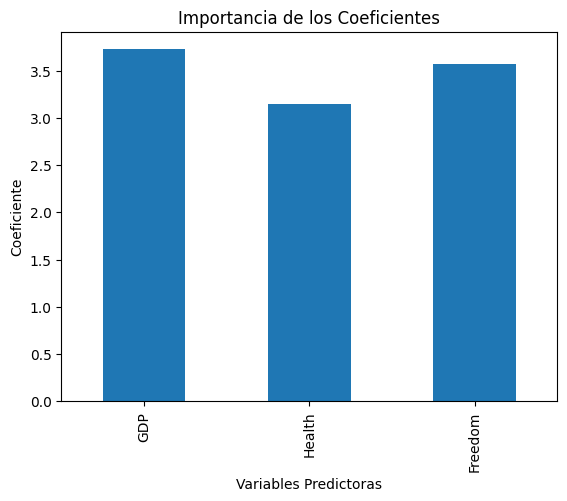

In [19]:
feature_importance = pd.Series(log_reg.coef_[0], index=X.columns)
feature_importance.plot(kind='bar')
plt.title("Importancia de los Coeficientes")
plt.xlabel("Variables Predictoras")
plt.ylabel("Coeficiente")
plt.show()


Los coeficientes del modelo revelan que GDP (con un valor de 3.7) es el factor más influyente en la probabilidad de predecir "Felicidad". Esto indica que a medida que el producto interno bruto aumenta, también lo hace la probabilidad de que una predicción sea positiva para "Felicidad". Freedom, con un coeficiente de 3.5, es el segundo factor en importancia, sugiriendo que una mayor libertad percibida también incrementa considerablemente la probabilidad de felicidad. Por último, Health tiene un coeficiente de 3.0, lo que señala que el bienestar físico contribuye de manera significativa a la predicción, aunque en menor medida que GDP y Freedom. Estos coeficientes en conjunto muestran que factores económicos, de libertad y de salud están fuertemente ligados a la percepción de felicidad en el modelo.

### Histograma de probabilidades de prediccion:

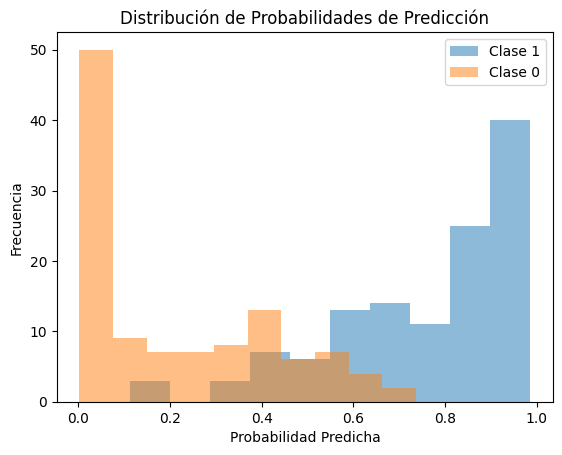

In [21]:
# Obtener las probabilidades de predicción de la clase positiva (1)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Selecciona solo la probabilidad de la clase positiva
plt.hist(y_prob[y_test == 1], bins=10, alpha=0.5, label="Clase 1")
plt.hist(y_prob[y_test == 0], bins=10, alpha=0.5, label="Clase 0")
plt.xlabel("Probabilidad Predicha")
plt.ylabel("Frecuencia")
plt.title("Distribución de Probabilidades de Predicción")
plt.legend()
plt.show()


La gráfica muestra la distribución de probabilidades de predicción para cada clase (Clase 1 y Clase 0). Observamos que el modelo asigna altas probabilidades (cercanas a 1) a la mayoría de los casos en Clase 1, lo que indica una alta confianza en sus predicciones positivas. Para Clase 0, la mayoría de las probabilidades se concentran cerca de 0, reflejando también una alta confianza en las predicciones negativas. Sin embargo, en el rango intermedio (0.3 a 0.6), hay una pequeña superposición entre ambas clases, lo que sugiere que el modelo tiene menor seguridad en esos casos y podría beneficiarse de ajustes para mejorar su discriminación entre clases.